In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
from pathlib import Path
from collections import OrderedDict
from time import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
BUSINESS_PATH = 'C:\\Users\\lenovo\\Desktop\\Desktop\\yelp_academic_dataset_business.json'

In [3]:
def load_rows(file_path, nrows=None, only_return_count=False, verbose=True):
    """
    Returns dataframe from json file
    """
    tic = time()
    with open(file_path, encoding = 'utf-8') as json_file:
        count = 0
        objs = []
        line = json_file.readline()
        while (nrows is None or count<nrows) and line:
            count += 1
            if not only_return_count:
                obj = json.loads(line)
                objs.append(obj)
            line = json_file.readline()
        toc = time()
        if verbose:
            print(file_path.split('/')[-1], 'loaded. Count =', count, ', Time =', round(toc-tic,2), 'secs.')

        if only_return_count:
            return count

        return pd.DataFrame(objs)

In [4]:
business_df_head = load_rows(BUSINESS_PATH, 5)
business_df_head.head()

C:\Users\lenovo\Desktop\Desktop\yelp_academic_dataset_business.json loaded. Count = 5 , Time = 0.0 secs.


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [5]:
# load the original data 
business_df = load_rows(BUSINESS_PATH)
business_df

C:\Users\lenovo\Desktop\Desktop\yelp_academic_dataset_business.json loaded. Count = 160585 , Time = 2.21 secs.


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [6]:
# select businesses which are Restaurant
rest = business_df.categories.str.contains('Restaurant', na=False)
df1 = business_df[rest]

In [7]:
df1

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160573,Zl6SUy6x9jqjRu2HbtEO6A,Split Dine and Drink,7335 SW Bridgeport Rd,Tigard,OR,97224,45.394457,-122.752535,2.0,48,0,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","American (Traditional), Desserts, American (Ne...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."
160575,uXdQkuEtvLAzfc3MsO-sTQ,Mama's Cocina Latina,1958 Piedmont Rd NE,Atlanta,GA,30324,33.810996,-84.367084,3.0,185,1,"{'WiFi': 'u'no'', 'BusinessAcceptsCreditCards'...","Restaurants, Mexican, Latin American","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [8]:
# drop businesses which are closed now
df1.drop(df1[df1.is_open == 0].index, inplace=True)

In [9]:
df1

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160563,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta,59 Williams St,Chelsea,MA,02150,42.389221,-71.040882,5.0,733,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,1,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'..."
160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."
160575,uXdQkuEtvLAzfc3MsO-sTQ,Mama's Cocina Latina,1958 Piedmont Rd NE,Atlanta,GA,30324,33.810996,-84.367084,3.0,185,1,"{'WiFi': 'u'no'', 'BusinessAcceptsCreditCards'...","Restaurants, Mexican, Latin American","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [10]:
df_city = df1['city'].value_counts().to_frame()
df_city

,city
Portland,3118
Vancouver,2977
Austin,2840
Orlando,2566
Atlanta,2548
...,...
Loughman,1
Alamonte Springs,1
Columbus,1
Steveston,1


In [11]:
city_filter1 = ['Portland','Vancouver','Austin','Orlando','Atlanta','Columbus','Boston','Richmond','Burnaby','Kissimmee']
df4 = df1[df1.city.isin(city_filter1)] 

Text(0.5, 1.0, 'Top 10 cities with the largest number of businesses')

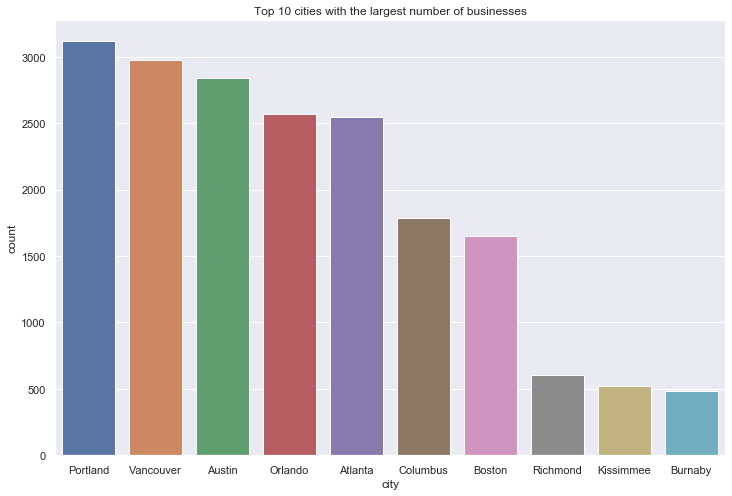

In [12]:
sns.set(rc = {'figure.figsize':(12, 8)})
ax = sns.countplot(x="city", data=df4, order=df4['city'].value_counts().index)
plt.title('Top 10 cities with the largest number of businesses')

In [13]:
df5 = df4[["city","stars","review_count"]].groupby("city").mean()

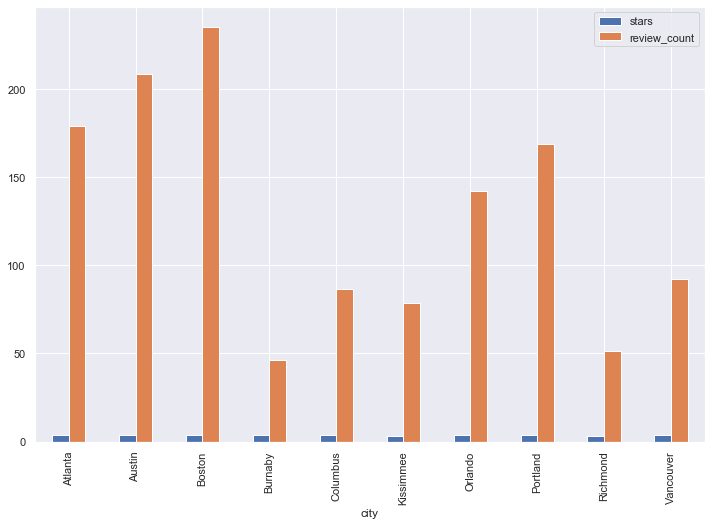

In [14]:
df5.plot(kind = 'bar')
plt.show()

In [15]:
# select businesses which located in top5 city
city_filter = ['Portland','Vancouver','Austin','Orlando','Atlanta']
df1 = df1[df1.city.isin(city_filter)]
df1.reset_index(drop=True,inplace = True)
df1 = df1.drop('is_open', axis = 1)
df2 = df1.dropna()
df2

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
0,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
1,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
2,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."
3,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,3.0,7,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
4,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,12429 NE Glisan St,Portland,OR,97230,45.526473,-122.535323,3.5,19,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14043,GTVOlps3_pCc9urmGc02Qg,Fresh Kitchen,"851 N Alafaya Trl, Ste Q-01",Orlando,FL,32828,28.557090,-81.206914,4.5,301,"{'RestaurantsTakeOut': 'True', 'RestaurantsTab...","Gluten-Free, Specialty Food, Fruits & Veggies,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:30',..."
14044,E42dulQ-OfZ3caiKKh7J5w,LongHorn Steakhouse,3101 E Colonial Dr,Orlando,FL,32803,28.553748,-81.344369,4.0,73,"{'BusinessAcceptsBitcoin': 'False', 'OutdoorSe...","Barbeque, Restaurants, American (Traditional),...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
14045,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,Portland,OR,97239,45.483154,-122.682748,3.5,457,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
14046,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'..."


In [16]:
# get_dummies - city
df2 = df2.join(pd.get_dummies(df2.city))
df2 = df2.drop('city', axis = 1)
df2

,business_id,name,address,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,Atlanta,Austin,Orlando,Portland,Vancouver
0,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,OR,97218,45.588906,-122.593331,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",0,0,0,1,0
1,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,BC,V5V,49.251342,-123.101333,3.5,169,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",0,0,0,0,1
2,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,FL,32806,28.513265,-81.374707,4.5,135,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",0,0,1,0,0
3,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,FL,32830,28.350498,-81.542819,3.0,7,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '...",0,0,1,0,0
4,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,12429 NE Glisan St,OR,97230,45.526473,-122.535323,3.5,19,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14043,GTVOlps3_pCc9urmGc02Qg,Fresh Kitchen,"851 N Alafaya Trl, Ste Q-01",FL,32828,28.557090,-81.206914,4.5,301,"{'RestaurantsTakeOut': 'True', 'RestaurantsTab...","Gluten-Free, Specialty Food, Fruits & Veggies,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:30',...",0,0,1,0,0
14044,E42dulQ-OfZ3caiKKh7J5w,LongHorn Steakhouse,3101 E Colonial Dr,FL,32803,28.553748,-81.344369,4.0,73,"{'BusinessAcceptsBitcoin': 'False', 'OutdoorSe...","Barbeque, Restaurants, American (Traditional),...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",0,0,1,0,0
14045,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,OR,97239,45.483154,-122.682748,3.5,457,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",0,0,0,1,0
14046,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,FL,32803,28.544430,-81.351606,4.5,437,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'...",0,0,1,0,0


In [17]:
from datetime import datetime
# calculate total_hours per week
def count_hours(df):
    hours = df['hours']
    week_hours = 0
    for day in hours.values():
        day = day.split('-')
        open_time = datetime.strptime(day[0],'%H:%M')
        close_time = datetime.strptime(day[1],'%H:%M')
        hour = close_time - open_time
        hour = hour.seconds/3600
        week_hours += hour
    return week_hours

In [18]:
df2['total_hours'] = df2.apply(count_hours,axis = 1)
print(df2['total_hours'])

0         90.0
1         28.0
2         35.0
3         90.0
4        114.0
         ...  
14043     63.5
14044     66.0
14045     43.5
14046     66.5
14047      0.0
Name: total_hours, Length: 12658, dtype: float64


In [19]:
df2

,business_id,name,address,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,Atlanta,Austin,Orlando,Portland,Vancouver,total_hours
0,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,OR,97218,45.588906,-122.593331,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",0,0,0,1,0,90.0
1,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,BC,V5V,49.251342,-123.101333,3.5,169,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",0,0,0,0,1,28.0
2,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,FL,32806,28.513265,-81.374707,4.5,135,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",0,0,1,0,0,35.0
3,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,FL,32830,28.350498,-81.542819,3.0,7,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '...",0,0,1,0,0,90.0
4,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,12429 NE Glisan St,OR,97230,45.526473,-122.535323,3.5,19,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",0,0,0,1,0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14043,GTVOlps3_pCc9urmGc02Qg,Fresh Kitchen,"851 N Alafaya Trl, Ste Q-01",FL,32828,28.557090,-81.206914,4.5,301,"{'RestaurantsTakeOut': 'True', 'RestaurantsTab...","Gluten-Free, Specialty Food, Fruits & Veggies,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:30',...",0,0,1,0,0,63.5
14044,E42dulQ-OfZ3caiKKh7J5w,LongHorn Steakhouse,3101 E Colonial Dr,FL,32803,28.553748,-81.344369,4.0,73,"{'BusinessAcceptsBitcoin': 'False', 'OutdoorSe...","Barbeque, Restaurants, American (Traditional),...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",0,0,1,0,0,66.0
14045,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,OR,97239,45.483154,-122.682748,3.5,457,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",0,0,0,1,0,43.5
14046,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,FL,32803,28.544430,-81.351606,4.5,437,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'...",0,0,1,0,0,66.5


In [20]:
# attributes - description

total_attribute = {}
for attribute in df2.attributes:
    for i in attribute.keys():
        if i not in total_attribute.keys():
            total_attribute[i] = 1
        else:
            total_attribute[i] += 1

In [21]:
print(len(total_attribute))
total_attribute

38


{'RestaurantsTakeOut': 12178,
 'RestaurantsAttire': 9616,
 'GoodForKids': 10130,
 'BikeParking': 10476,
 'OutdoorSeating': 11246,
 'Ambience': 10850,
 'Caters': 9995,
 'RestaurantsReservations': 11015,
 'RestaurantsDelivery': 12054,
 'HasTV': 11065,
 'RestaurantsGoodForGroups': 10327,
 'BusinessAcceptsCreditCards': 10088,
 'NoiseLevel': 9163,
 'ByAppointmentOnly': 1610,
 'RestaurantsPriceRange2': 10894,
 'WiFi': 10710,
 'BusinessParking': 11733,
 'Alcohol': 10486,
 'GoodForMeal': 9376,
 'DogsAllowed': 4934,
 'CoatCheck': 1494,
 'GoodForDancing': 1356,
 'RestaurantsTableService': 6602,
 'HappyHour': 4875,
 'Music': 2009,
 'WheelchairAccessible': 4978,
 'Smoking': 1275,
 'BestNights': 1706,
 'BusinessAcceptsBitcoin': 2213,
 'Corkage': 1462,
 'BYOB': 1577,
 'BYOBCorkage': 842,
 'DriveThru': 1737,
 'RestaurantsCounterService': 10,
 'DietaryRestrictions': 22,
 'AgesAllowed': 11,
 'Open24Hours': 14,
 'AcceptsInsurance': 5}

In [22]:
def attr_vlaue(attr):
    values = {}
    for attribute in df2.attributes:
        for key,value in attribute.items():
            if key == attr:
                if value not in values.keys():
                    values[value] = 1
                else:
                    values[value] += 1
    return values

In [23]:
print('RestaurantsTakeOut:',attr_vlaue('RestaurantsTakeOut'))
print('RestaurantsDelivery',attr_vlaue('RestaurantsDelivery'))
print('RestaurantsPriceRange2',attr_vlaue('RestaurantsPriceRange2'))
print('BikeParking',attr_vlaue('BikeParking'))
print('BusinessAcceptsCreditCards',attr_vlaue('BusinessAcceptsCreditCards'))
print('WiFi',attr_vlaue('WiFi'))
print('OutdoorSeating',attr_vlaue('OutdoorSeating'))
print('RestaurantsReservations',attr_vlaue('RestaurantsReservations'))

RestaurantsTakeOut: {'True': 11156, 'None': 415, 'False': 607}
RestaurantsDelivery {'False': 3443, 'True': 7826, 'None': 785}
RestaurantsPriceRange2 {'2': 5563, '1': 4828, '4': 75, '3': 424, 'None': 4}
BikeParking {'False': 1936, 'True': 8538, 'None': 2}
BusinessAcceptsCreditCards {'True': 9932, 'False': 156}
WiFi {"u'free'": 4821, "u'no'": 2865, "'free'": 1729, "'no'": 1221, "u'paid'": 51, 'None': 6, "'paid'": 17}
OutdoorSeating {'False': 4277, 'None': 1027, 'True': 5942}
RestaurantsReservations {'False': 7456, 'True': 3532, 'None': 27}


In [24]:
attr_vlaue('BusinessParking')

{"{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}": 208,
 "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}": 2766,
 "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}": 3831,
 "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}": 1519,
 "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}": 1161,
 "{'garage': False, 'street': None, 'validated': False, 'lot': True, 'valet': False}": 110,
 "{'garage': None, 'street': True, 'validated': False, 'lot': None, 'valet': False}": 17,
 "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}": 48,
 "{'garage': False, 'street': None, 'validated': False, 'lot': None, 'valet': False}": 77,
 "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': True}": 102,
 "{'garage': True, 'street': True, 'validated': True, 'lot': True, 'valet': T

In [25]:
# attributes included in the model：
# RestaurantsTakeOut: {'True': 17887, 'None': 635, 'False': 1720}
# RestaurantsDelivery {'False': 5301, 'True': 12535, 'None': 1070}
# RestaurantsPriceRange2 {'2': 9653, '1': 8078, '3': 797, '4': 124, 'None': 7}
# BikeParking {'False': 3514, 'True': 14217, 'None': 3}
# BusinessAcceptsCreditCards {'True': 16719, 'False': 319, 'None': 2}
# WiFi {"u'free'": 7323, "u'no'": 4215, "'free'": 2759, "'no'": 1823, "u'paid'": 83, "'paid'": 31, 'None': 9} -- finally dropped
# OutdoorSeating {'False': 6795, 'None': 1414, 'True': 8143}
# RestaurantsReservations {'False': 10090, 'True': 4949, 'None': 41}
attr_list = ['RestaurantsTakeOut','RestaurantsDelivery','RestaurantsPriceRange2','BikeParking','BusinessAcceptsCreditCards','OutdoorSeating','RestaurantsReservations']
def new_attr(df,attr):
    if attr in df['attributes'].keys():
        return df['attributes'][attr]
    else:
        return None
for attr in attr_list:
    df2[attr] = df2.apply(new_attr,axis=1,args=(attr,))

In [26]:
df3 = df2.drop(columns = ['name','address','postal_code','hours'])
df3

,business_id,state,latitude,longitude,stars,review_count,attributes,categories,Atlanta,Austin,...,Portland,Vancouver,total_hours,RestaurantsTakeOut,RestaurantsDelivery,RestaurantsPriceRange2,BikeParking,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations
0,tCbdrRPZA0oiIYSmHG3J0w,OR,45.588906,-122.593331,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...",0,0,...,1,0,90.0,True,False,2,False,True,False,False
1,D4JtQNTI4X3KcbzacDJsMw,BC,49.251342,-123.101333,3.5,169,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai",0,0,...,0,1,28.0,True,True,2,True,None,False,True
2,ufCxltuh56FF4-ZFZ6cVhg,FL,28.513265,-81.374707,4.5,135,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...",0,0,...,0,0,35.0,True,False,1,True,True,None,None
3,GfWJ19Js7wX9rwaHQ7KbGw,FL,28.350498,-81.542819,3.0,7,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe...",0,0,...,0,0,90.0,None,None,2,True,True,None,False
4,jx91IMdGOmLOo8h_F9z39g,OR,45.526473,-122.535323,3.5,19,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants",0,0,...,1,0,114.0,True,False,2,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14043,GTVOlps3_pCc9urmGc02Qg,FL,28.557090,-81.206914,4.5,301,"{'RestaurantsTakeOut': 'True', 'RestaurantsTab...","Gluten-Free, Specialty Food, Fruits & Veggies,...",0,0,...,0,0,63.5,True,True,2,True,True,True,False
14044,E42dulQ-OfZ3caiKKh7J5w,FL,28.553748,-81.344369,4.0,73,"{'BusinessAcceptsBitcoin': 'False', 'OutdoorSe...","Barbeque, Restaurants, American (Traditional),...",0,0,...,0,0,66.0,True,False,2,False,True,False,False
14045,jYgqSazE0gUyI7qq086Dzw,OR,45.483154,-122.682748,3.5,457,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...",0,0,...,1,0,43.5,True,True,3,False,True,False,True
14046,r5Uag1JqYjr2nbxQCVqm8A,FL,28.544430,-81.351606,4.5,437,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...",0,0,...,0,0,66.5,True,True,2,False,True,True,True


In [27]:
def transfer_dummy(attr):
    global df3
    df3 = df3.join(pd.get_dummies(df3[attr]))
    df3 = df3.rename(columns = {'False': '{}_False'.format(attr), 'True': '{}_True'.format(attr),'None':'{}_None'.format(attr)})
    df3 = df3.drop(columns = attr)

In [28]:
# df3 = df3.join(pd.get_dummies(df3.RestaurantsTakeOut))
# df3 = df3.rename(columns = {'False': 'RestaurantsTakeOut_False', 'True': 'RestaurantsTakeOut_True','None':'RestaurantsTakeOut_None'})
# df3 = df3.join(pd.get_dummies(df3.RestaurantsDelivery))
# df3 = df3.rename(columns = {'False': 'RestaurantsTakeOut_False', 'True': 'RestaurantsTakeOut_True','None':'RestaurantsTakeOut_None'})
#
# df3 = df3.join(pd.get_dummies(df3.RestaurantsPriceRange2))
# df3 = df3.join(pd.get_dummies(df3.RestaurantsReservations))
# df3 = df3.join(pd.get_dummies(df3.BikeParking))
# df3 = df3.join(pd.get_dummies(df3.BusinessAcceptsCreditCards))
# df3 = df3.join(pd.get_dummies(df3.OutdoorSeating))
# df3 = df3.join(pd.get_dummies(df3.WiFi))
# attr_list.pop(5)
# attr_list
for i in attr_list:
    transfer_dummy(i)


In [29]:
df3 = df3.reset_index(drop=True)

In [30]:
df3.head()

,business_id,state,latitude,longitude,stars,review_count,attributes,categories,Atlanta,Austin,...,BikeParking_None,BikeParking_True,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_True,OutdoorSeating_False,OutdoorSeating_None,OutdoorSeating_True,RestaurantsReservations_False,RestaurantsReservations_None,RestaurantsReservations_True
0,tCbdrRPZA0oiIYSmHG3J0w,OR,45.588906,-122.593331,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...",0,0,...,0,0,0,1,1,0,0,1,0,0
1,D4JtQNTI4X3KcbzacDJsMw,BC,49.251342,-123.101333,3.5,169,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai",0,0,...,0,1,0,0,1,0,0,0,0,1
2,ufCxltuh56FF4-ZFZ6cVhg,FL,28.513265,-81.374707,4.5,135,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...",0,0,...,0,1,0,1,0,0,0,0,0,0
3,GfWJ19Js7wX9rwaHQ7KbGw,FL,28.350498,-81.542819,3.0,7,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe...",0,0,...,0,1,0,1,0,0,0,1,0,0
4,jx91IMdGOmLOo8h_F9z39g,OR,45.526473,-122.535323,3.5,19,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants",0,0,...,0,1,0,1,1,0,0,1,0,0


In [31]:
# clean categories
df3["categories"] = \
df3["categories"].apply(lambda s:[ss.strip() for ss in s.split(",") if ss.strip() != "Restaurants"])

In [32]:
all_categ = [ss for l in list(df3["categories"].values) for ss in l]
categ15 = pd.Series(all_categ).value_counts(ascending=False)[1:16].index #since first is food--meaningless
categ15

Index(['Nightlife', 'Bars', 'Sandwiches', 'American (Traditional)',
       'Breakfast & Brunch', 'Fast Food', 'American (New)', 'Mexican',
       'Coffee & Tea', 'Burgers', 'Pizza', 'Cafes', 'Food Trucks',
       'Event Planning & Services', 'Seafood'],
      dtype='object')

In [33]:
# Transform each element of a list-like(list/tuple/dict/set/series/array) to a row, replicating index values.
# list-like columns to long format
big = df3[["business_id","categories"]].explode("categories")
big = big[big["categories"].isin(categ15)]
big["values"] = 1
big_categ = big.pivot_table(values = "values",index="business_id",columns="categories",
              aggfunc = "count",fill_value = 0)
big_categ.head()

categories,American (New),American (Traditional),Bars,Breakfast & Brunch,Burgers,Cafes,Coffee & Tea,Event Planning & Services,Fast Food,Food Trucks,Mexican,Nightlife,Pizza,Sandwiches,Seafood
business_id,,,,,,,,,,,,,,,
--UNNdnHRhsyFUbDgumdtQ,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-0OWS89ebRdvzOQkjptyEw,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
-0p-JeIeAY_u6NEEUMgGNg,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
-1ShItlulHnBsoOQWnblzw,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
-1XOUWwxeSAVdtuXuP9twg,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [35]:
big_categ.reset_index(inplace=True)
categ_full = df3.merge(big_categ,how="left",on="business_id")
categ_full = categ_full.fillna(0)

In [39]:
df_final = categ_full.drop(['business_id','attributes'],axis = 1)

In [40]:
# save to CSV
filename = "C:\\Users\\lenovo\\Desktop\\Desktop\\yelp_business_cleaned.csv"
df_final.to_csv(filename,index=False)